In [1]:
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data 
#for mac
#%cd C:\Users\szdxl\OneDrive\Duke Assigment\Job Seeking\Collection_DS_takehome_challenges\data #for win

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Data Inspection

In [4]:
data=pd.read_csv('employee_retention_data.csv', parse_dates=['join_date', 'quit_date'])

In [5]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [7]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [8]:
#notice there is null data.
#test null information
data.isnull().sum()
#it's fine. quit date is null means not quit yet

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Question1: Estimate the headcount for each company each day

In [9]:
unique_date=pd.date_range(start='2011/01/24', end='2015/12/13', freq='D')
unique_date

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1785, freq='D')

In [10]:
unique_company=np.sort(data['company_id'].unique())
#np.sort(unique_company)
unique_company

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
print((2>1) and (3>5))

False


In [12]:
day=[]
employee_headcount=[]
company=[]


for days in unique_date:
    for id in unique_company:
        join=len(data[(data['join_date']<=days) & (data['company_id']==id)])
        left=len(data[(data['quit_date']<=days) & (data['company_id']==id)])
        employee_headcount.append(join-left)
        company.append(id)
        day.append(days)
        

In [13]:
HC=pd.DataFrame({'day':day, 'company_id':company, 'employee_headcount':employee_headcount})
HC.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


# Find the important Factor

In [14]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [15]:
#a easy thinking: let's split the data to two parts:
#the one who stays and the one who churns
stay_data=data[data['quit_date'].isnull()]
quit_data=data[-data['quit_date'].isnull()]


In [16]:
#and of course we want to do research on the people who churn
quit_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30


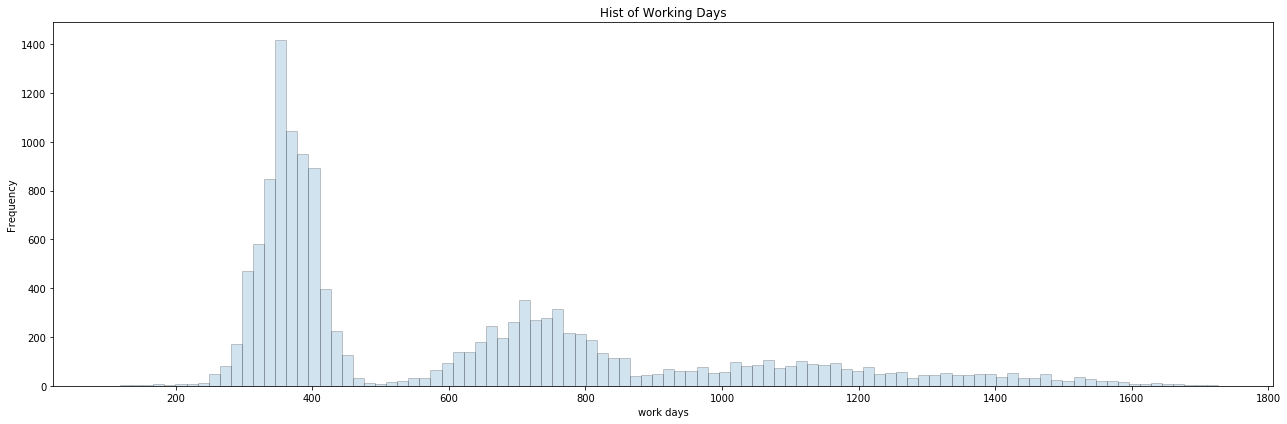

In [17]:
#let's first check how long the people work before they actually churn
work_length=quit_data['quit_date']-quit_data['join_date']
work_days=np.array(list(map(lambda x: x.days, work_length)))

#let's draw the distributions of average work length
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}
fig, ax=plt.subplots(figsize=(18, 6))
sns.distplot(work_days, bins=100, hist_kws=hist_kws, kde=False#kde: PDF->frequency?
            , ax=ax)
ax.set_title('Hist of Working Days')
ax.set_xlabel('work days')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**AS we can see from the picture, there are two peaks of churning: around 350 days and around 700 days**

In [18]:
#some HR would say in certain months the churn rate can be very high. let's see if that;s right
work_month_raw=quit_data['quit_date']
work_month=np.array(list(map(lambda x: x.month, work_month_raw)))

In [19]:
work_month

array([10,  4,  6, ..., 10,  1, 12])

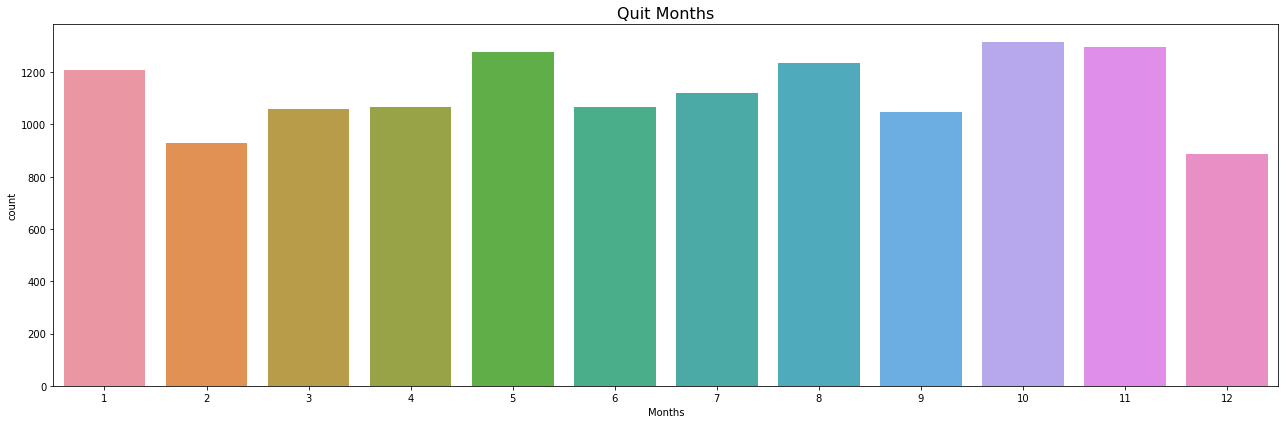

In [20]:
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.2}
fig, ax=plt.subplots(figsize=(18, 6))
sns.countplot(work_month)
ax.set_title('Quit Months', fontsize=16)
ax.set_xlabel('Months')
plt.tight_layout()
plt.show()

**Dec is lowest**

**Let's skip the visualization part to the model part**

In [21]:
#create churn variable
data['churn']=data['quit_date'].apply(lambda x: 0 if pd.isnull(x)  else 1)
data['company_id']=data['company_id'].astype('category')
data['dept']=data['dept'].astype('category')
data['churn']=data['churn'].astype('category')

data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 8 columns):
employee_id    24702 non-null float64
company_id     24702 non-null category
dept           24702 non-null category
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
churn          24702 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(1)
memory usage: 1.0 MB


In [23]:
#which mrtrics do we want to use?
select=['company_id','dept', 'seniority', 'salary' ]
X=data[select]
X=pd.get_dummies(X)
y=data['churn']


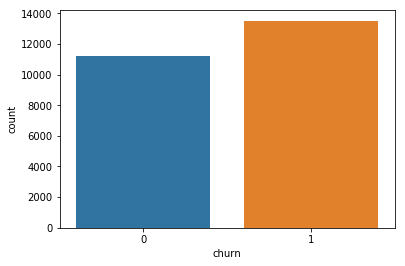

In [24]:
sns.countplot(y)
#looks like balanced sample

In [26]:
#let's first try easy split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train.head()

,company_id,dept,seniority,salary
1608,5,0,5,58000.0
8247,1,0,1,30000.0
13250,1,1,27,296000.0
6677,1,4,22,193000.0
3015,1,3,5,190000.0


In [28]:
#modeling
#randomForest
modelRF=RandomForestClassifier(n_estimators=400, bootstrap=True, max_features='sqrt', random_state=42)
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
predictionRF=modelRF.predict(X_test)

In [30]:
print(classification_report(y_test, predictionRF))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45      2203
           1       0.56      0.56      0.56      2738

   micro avg       0.51      0.51      0.51      4941
   macro avg       0.51      0.51      0.51      4941
weighted avg       0.51      0.51      0.51      4941



In [32]:
RF_roc=roc_auc_score(y_test, predictionRF)
RF_roc

0.5063694769102628

In [38]:
modelRF.feature_importances_
#how to deal with the one-hot code?

array([2.63869202e-01, 6.76715427e-01, 4.97065811e-03, 3.95027452e-03,
       4.69959769e-03, 4.51263690e-03, 4.38533779e-03, 4.16570664e-03,
       4.08350248e-03, 3.89103649e-03, 3.74466424e-03, 3.81842720e-03,
       4.31567267e-04, 4.96041462e-04, 1.91172233e-03, 2.69596579e-03,
       2.72632515e-03, 3.01330600e-03, 3.05634999e-03, 2.86225142e-03])

In [41]:
X_train.columns

Index(['seniority', 'salary', 'company_id_1', 'company_id_2', 'company_id_3',
       'company_id_4', 'company_id_5', 'company_id_6', 'company_id_7',
       'company_id_8', 'company_id_9', 'company_id_10', 'company_id_11',
       'company_id_12', 'dept_customer_service', 'dept_data_science',
       'dept_design', 'dept_engineer', 'dept_marketing', 'dept_sales'],
      dtype='object')

In [45]:
#But here Decision Tree may be a better choice since we are not CHASING GOOD PREDICTION BUT TO UNDERSTAND THE IMPORTANT FEATURE!
#decision tree would be easier to interpret and more visualization-friendly

In [133]:
#pip install graphviz

In [132]:
#conda install graphviz

In [48]:
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [62]:
select=['company_id','dept', 'seniority', 'salary' ]
X=data[select]
#X=pd.get_dummies(X)
y=data['churn']

In [64]:
X.head()

,company_id,dept,seniority,salary
0,7,customer_service,28,89000.0
1,7,marketing,20,183000.0
2,4,marketing,14,101000.0
3,7,customer_service,20,115000.0
4,2,data_science,23,276000.0


In [65]:
X['company_id']=X['company_id'].astype('category')
X['dept']=X['dept'].astype('category')

#let's first try easy split


/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['dept']=le.fit_transform(data['dept'])
X.head()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

/Users/pg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
DT=DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

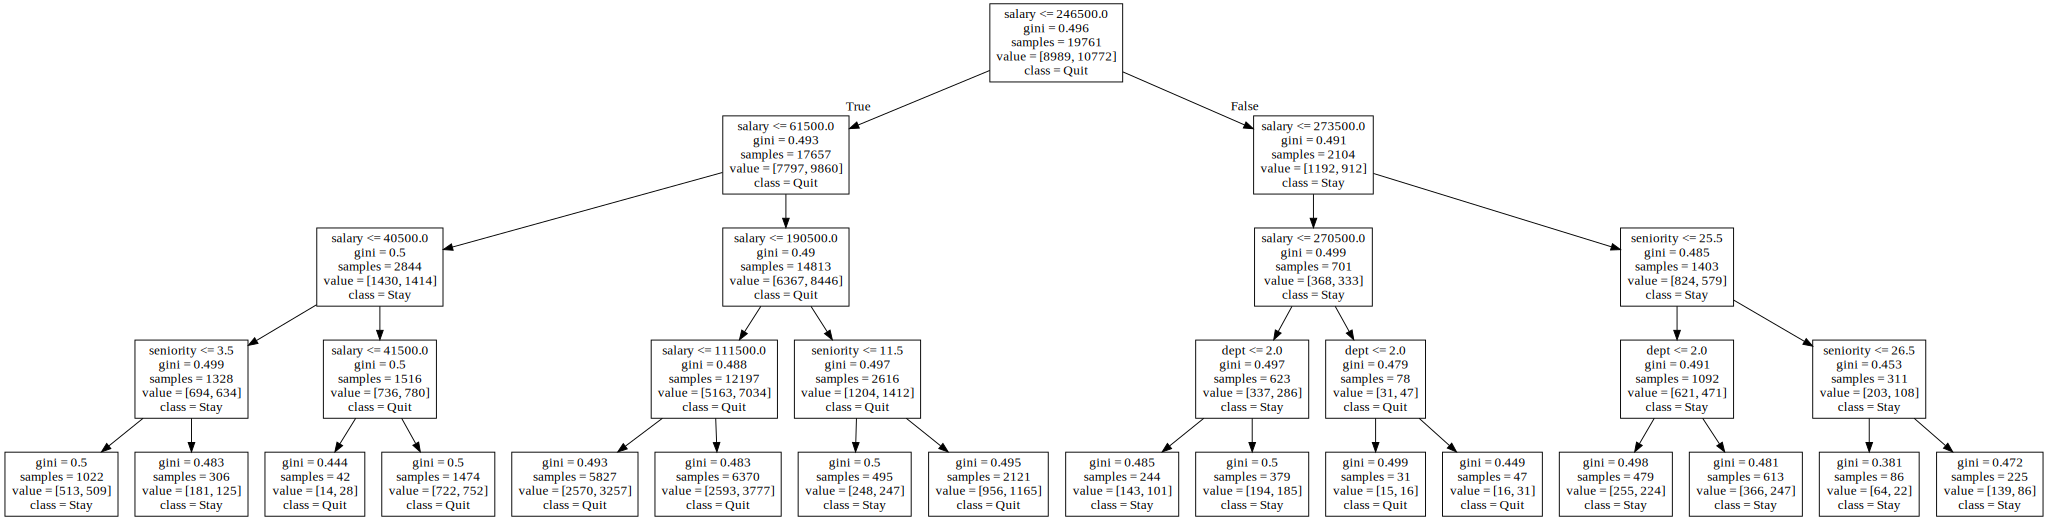

In [113]:
#visualization
from sklearn import tree
features=list(X_train.columns)
targets=['Stay', 'Quit']
dot_data=tree.export_graphviz(DT, feature_names=features, class_names=targets)
pic=graphviz.Source(dot_data)
pic
#values: class between 2

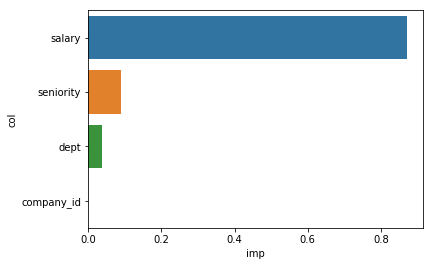

In [114]:
imp_chart=pd.DataFrame({'imp': DT.feature_importances_, 'col': X_train.columns})
imp_chart.sort_values(by='imp', inplace=True, ascending=False)
sns.barplot(x='imp', y='col', data=imp_chart)

# A deeper look into salary

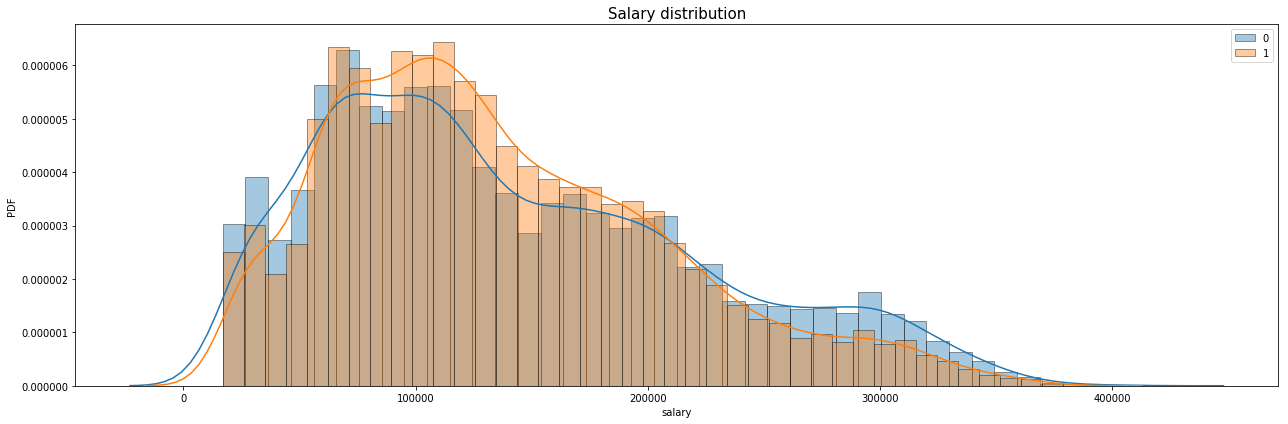

In [128]:
hist_kws={'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.4}
fig, ax=plt.subplots(figsize=(18, 6))
sns.distplot(data[data['churn']==0]['salary'], label='0', hist_kws=hist_kws, bins=40)
sns.distplot(data[data['churn']==1]['salary'], label='1', hist_kws=hist_kws, bins=40)
ax.set_title('Salary distribution', fontsize=15)
ax.set_ylabel('PDF')
plt.legend()
plt.tight_layout()
plt.show()

**Salary around 1000 are more likely to churn**

# Conclusion:
**1. We can see both from the tree and feature importance pic that salary is obviously the most important factor that influence whether or not a employee will churn.**

**2. People with middle salary are more likely to churn. Probably because they want to churn to increase their salary, which is common in the market.**

**3. In terms of time, December shows the lowest churn frequency, which makes sense because there will be bonus at Jan usually**

# Takeaways of this project:

**1. Look at the question carefully. it does not care about prediction but the important features.**

**2. The differences between decision tree and Random Forest. Brefily speaking, random forest has better performance on prediction, but is harder to interpret.**

**3. The use of:**

**from sklearn.preprocessing import LabelEncoder**

**le=LabelEncoder()**

**X['dept']=le.fit_transform(data['dept'])**

**to transform the 'string'/'category' variable into 'numerical'**

**not sure if that's OK. Needs more research**

**4. After find the most important feature, look deeper into that feature to give device.**